# CASE STUDY:DATA EXPLORATORY ANALYSIS AND HYPOTHESIS TESTING  FOR INSURANCE CLAIMS DATA

#### Q1 Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view ofthe data. Use the same for the subsequent questions.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
%matplotlib inline
import scipy.stats as stats

In [4]:
file_path = ('F:/AnalytixLabs/Manuj_DS/Case Study 3 Insurance/')

In [5]:
claims_data = pd.read_csv (file_path + 'claims.csv')
cust_demo_data = pd.read_csv(file_path + 'cust_demographics.csv')

In [6]:
claims_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [7]:
cust_demo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [8]:
claims_360_data = pd.merge( left = claims_data, right = cust_demo_data, 
                            left_on = 'customer_id', right_on = 'CUST_ID', 
                            how ='outer', indicator =True )

In [9]:
claims_360_data.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,both
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,both
2,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,both


In [10]:
claims_360_data.drop(columns ='CUST_ID', inplace = True )
claims_360_data.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,_merge
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,both
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,both
2,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,both
3,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver,both
4,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,both


#### Q2 - Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [11]:
claims_360_data['DateOfBirth']=pd.to_datetime(claims_360_data.DateOfBirth, format = '%d-%b-%y')
claims_360_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,_merge
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,both
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,both


In [12]:
claims_360_data.loc[claims_360_data.DateOfBirth.dt.year > 2020].shape[0]

246

In [13]:
claims_360_data.loc[(claims_360_data.DateOfBirth.dt.year > 2020),"DateOfBirth"]= claims_360_data[claims_360_data.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

In [14]:
claims_360_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,_merge
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,both
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,both


#### Q3 - Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [15]:
claims_360_data['claim_amount'] = claims_360_data['claim_amount'].replace({'\$': ''}, regex=True).astype(float)
claims_360_data.head(4)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,_merge
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,both
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,both
2,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,both
3,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,both


#### Q4 -Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [16]:
claims_360_data.claim_type.value_counts()

Material only          663
Material and injury    241
Injury only            196
Name: claim_type, dtype: int64

In [17]:
claims_360_data.police_report.value_counts()

No         630
Unknown    300
Yes        170
Name: police_report, dtype: int64

In [18]:
claims_360_data['alert']= np.where((claims_360_data['claim_type']=='Injury only') & (claims_360_data['police_report']=='Unknown'),1,0)

In [19]:
claims_360_data[claims_360_data['alert']==1]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,_merge,alert
80,50337100.0,15036122.0,Other driver error,07/20/2018,Auto,Unknown,Injury only,30080.0,1.0,No,Male,1988-03-30,IA,893-237-4791,Silver,both,1
82,84635473.0,74058124.0,Driver error,01/13/2018,Auto,Unknown,Injury only,21505.0,1.0,Yes,Male,1990-11-12,WV,172-685-2746,Silver,both,1
102,712628.0,74125758.0,Other causes,11/27/2017,Auto,Unknown,Injury only,22960.0,1.0,No,Male,1961-01-04,LA,876-786-8624,Gold,both,1
117,73460630.0,87993949.0,Other causes,06/23/2018,Auto,Unknown,Injury only,25783.0,2.0,Yes,Male,1969-05-29,NJ,754-586-4891,Platinum,both,1
119,38446319.0,55782839.0,Other causes,12/17/2017,Auto,Unknown,Injury only,21300.0,1.0,No,Female,1998-02-07,ND,918-849-3279,Gold,both,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,54131824.0,39497409.0,Other driver error,03/01/2018,Auto,Unknown,Injury only,32867.0,3.0,Yes,Female,1990-10-04,UT,976-537-8734,Silver,both,1
963,35136402.0,98401399.0,Natural causes,09/06/2018,Auto,Unknown,Injury only,24900.0,1.0,No,Female,1968-10-07,IA,219-593-1674,Silver,both,1
985,50022306.0,10198314.0,Other causes,05/01/2018,Auto,Unknown,Injury only,28658.0,1.0,Yes,Female,1980-11-10,WI,176-861-1936,Platinum,both,1
1023,30903408.0,77134414.0,Other driver error,01/07/2017,Auto,Unknown,Injury only,28760.0,1.0,No,Male,1983-07-10,AL,693-239-2865,Silver,both,1


#### Q5 - One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer IDshould remain unique.

##### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [20]:
claims_360_data1 = claims_360_data.groupby ('customer_id').first().reset_index(drop = True)

In [21]:
claims_360_data1


,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,_merge,alert
0,69348631.0,Driver error,04/10/2018,Auto,No,Injury only,NaN,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,both,0
1,40953049.0,Other causes,04/04/2018,Auto,No,Material and injury,39192.0,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,both,0
2,45780237.0,Natural causes,10/17/2017,Auto,Unknown,Material only,1621.5,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,both,0
3,89833962.0,Other causes,03/21/2018,Auto,Yes,Material and injury,37040.0,1.0,No,Male,1971-08-19,CA,187-348-8375,Gold,both,0
4,35782742.0,Other driver error,07/27/2018,Auto,No,Injury only,35250.0,3.0,No,Female,1980-08-10,NC,798-862-5398,Gold,both,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,4549014.0,Other causes,07/07/2018,Auto,No,Injury only,21480.0,1.0,No,Male,1965-01-28,UT,517-562-4916,Silver,both,0
1089,35453672.0,Natural causes,01/06/2018,Auto,Yes,Material and injury,14360.0,1.0,No,Female,1966-06-19,HI,457-752-1374,Gold,both,0
1090,37305754.0,Natural causes,04/04/2018,Auto,No,Material only,1242.0,1.0,Yes,Female,1963-11-18,NC,643-246-4718,Silver,both,0
1091,22960702.0,Driver error,11/13/2017,Auto,No,Material only,2415.0,2.0,Yes,Male,1995-06-08,OR,395-246-6172,Gold,both,0


#### Q6  - Check for missing values and impute the missing values with anappropriate value. (mean for continuous and mode for categorical)

In [22]:
claims_360_data.isna().sum()

claim_id                7
customer_id             7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
_merge                  0
alert                   0
dtype: int64

In [23]:
claims_360_data.dtypes

claim_id                      float64
customer_id                   float64
incident_cause                 object
claim_date                     object
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
_merge                       category
alert                           int32
dtype: object

In [24]:
cont_col = ['claim_amount']
cat_col =claims_360_data.columns.difference(['claim_amount'])
print(cont_col)
print(cat_col)

['claim_amount']
Index(['Contact', 'DateOfBirth', 'Segment', 'State', '_merge', 'alert',
       'claim_area', 'claim_date', 'claim_id', 'claim_type', 'customer_id',
       'fraudulent', 'gender', 'incident_cause', 'police_report',
       'total_policy_claims'],
      dtype='object')


In [25]:
for i in cat_col:
    claims_360_data[i]= claims_360_data[i].fillna(claims_360_data[i].mode()[0])
claims_360_data[cont_col]= claims_360_data[cont_col].fillna(claims_360_data[cont_col].mean())
claims_360_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,_merge,alert
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,both,0
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,both,0


In [26]:
claims_360_data.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
_merge                 0
alert                  0
dtype: int64

#### Q7 Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria

Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [27]:
sysdate = pd.Timestamp.now()
sysdate

Timestamp('2021-09-29 14:42:56.145168')

In [28]:
sysdate.year

2021

In [29]:
# iterating over entire column of year
claims_360_data['age']= sysdate.year - pd.to_datetime (claims_360_data['DateOfBirth'],'%Y-%m-%d').apply(lambda x: x.year)

In [30]:
claims_360_data['age_grp']=  np.where(claims_360_data['age'] < 18, 'Children',
                                np.where((claims_360_data['age'] >= 18) & (claims_360_data['age'] < 30), 'Youth',
                                   np.where((claims_360_data['age'] >30 ) & (claims_360_data['age'] <= 60), 'Adult', 'Senior')))
    

In [31]:
claims_360_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,_merge,alert,age,age_grp
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.000000,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,both,0,42,Adult
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.000000,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,both,0,51,Adult
2,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.500000,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,both,0,37,Adult
3,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.000000,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,both,0,37,Adult
4,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.000000,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,both,0,35,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,26832.0,19269962.0,Other causes,04/04/2018,Auto,No,Material only,12442.125121,1.0,No,Male,1980-07-22,CO,125-613-7698,Platinum,right_only,0,41,Adult
1103,26832.0,19269962.0,Other causes,04/04/2018,Auto,No,Material only,12442.125121,1.0,No,Female,1984-06-04,SC,264-374-5794,Platinum,right_only,0,37,Adult
1104,26832.0,19269962.0,Other causes,04/04/2018,Auto,No,Material only,12442.125121,1.0,No,Female,1984-05-25,NV,649-742-8132,Silver,right_only,0,37,Adult
1105,26832.0,19269962.0,Other causes,04/04/2018,Auto,No,Material only,12442.125121,1.0,No,Female,1996-08-06,NH,495-732-2638,Silver,right_only,0,25,Youth


#### Q8 - What is the average amount claimed by the customers from various segments?

In [32]:
#[[]] - Shows data in Dataframe
round(claims_360_data.groupby('Segment')[['claim_amount']].mean(),1)

,claim_amount
Segment,
Gold,12745.7
Platinum,12341.7
Silver,12208.4


#### Q9 - What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [33]:
claims_360_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,_merge,alert,age,age_grp
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,both,0,42,Adult
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,both,0,51,Adult


In [34]:
claims_360_data.incident_cause.value_counts()

Other causes          297
Driver error          262
Other driver error    249
Natural causes        189
Crime                 110
Name: incident_cause, dtype: int64

In [35]:
# iterating over entire column Date 20 days prior to 1st Oct --> groupby
round(claims_360_data.loc[claims_360_data.claim_date < "2018-09-01"].groupby('incident_cause')[['claim_amount']].sum(),1)

,claim_amount
incident_cause,
Crime,764262.6
Driver error,3626504.0
Natural causes,1391342.3
Other causes,4366682.4
Other driver error,3624641.3


#### Q10 - How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [36]:
claims_360_data.loc[ ((claims_360_data.State == 'TX') 
                    | (claims_360_data.State == 'DE') 
                    | (claims_360_data.State == 'AK')) 
                    & (claims_360_data.incident_cause.str.lower().str.contains("driver"))].groupby('State')[['State']].count()

,State
State,
AK,11
DE,15
TX,10


#### Q 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [37]:
f1=claims_360_data.loc[groupby(['gender','Segment'])[['claim_amount']].sum().reset_index()
f1.head()

,gender,Segment,claim_amount
0,Female,Gold,2.121950e+06
1,Female,Platinum,2.381747e+06
2,Female,Silver,1.938906e+06
3,Male,Gold,2.861606e+06
4,Male,Platinum,2.122983e+06


In [38]:
pie_E=pd.crosstab ( index = f1['Segment'], columns = f1['gender'], values = f1['claim_amount'], aggfunc ='sum')
pie_E

gender,Female,Male
Segment,,
Gold,2.121950e+06,2.861606e+06
Platinum,2.381747e+06,2.122983e+06
Silver,1.938906e+06,2.346240e+06


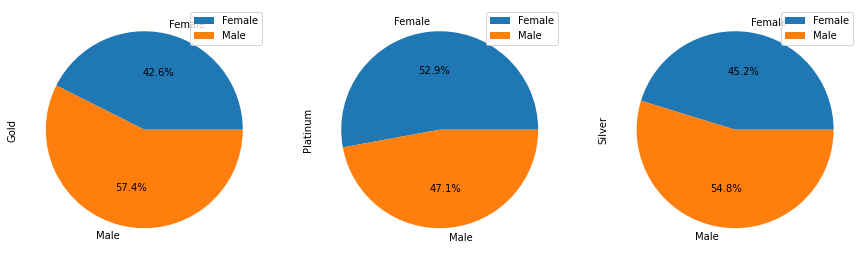

In [40]:
pie_E.T.plot(kind = "pie", subplots = True, legend = True, figsize = (15,8), autopct='%1.1f%%' )
plt.show()


#### Q12 -Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using abar chart

In [41]:
claims_360_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,_merge,alert,age,age_grp
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,both,0,42,Adult
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,both,0,51,Adult


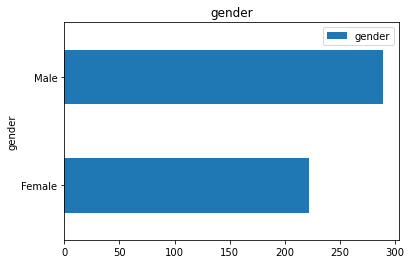

In [52]:
f2=claims_360_data.loc[ (claims_360_data.incident_cause.str.lower().str.contains("driver"))].groupby('gender')[['gender']].count()

f2.plot(kind = 'barh',subplots=True)
plt.show()

#### Q13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [54]:
claims_360_data.fraudulent.value_counts()

No     853
Yes    254
Name: fraudulent, dtype: int64

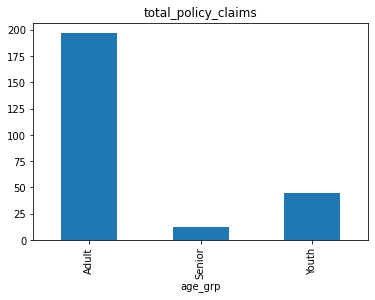

In [61]:
f3=claims_360_data.loc[claims_360_data.fraudulent == 'Yes'].groupby ('age_grp')['total_policy_claims'].count()
f3.plot(kind ='bar', subplots = True)
plt.show()

#### Q 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [75]:
claims_360_data['Cal'] = pd.to_datetime (claims_360_data['claim_date'])
claims_360_data['Month'] = pd.to_datetime (claims_360_data['Cal'],'%Y-%m-%d').apply(lambda x: x.month)

In [76]:

claims_360_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,DateOfBirth,State,Contact,Segment,_merge,alert,age,age_grp,Cal,Month
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,...,1979-01-12,VT,789-916-8172,Platinum,both,0,42,Adult,2017-11-27,11
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,...,1970-01-13,ME,265-543-1264,Silver,both,0,51,Adult,2018-10-03,10


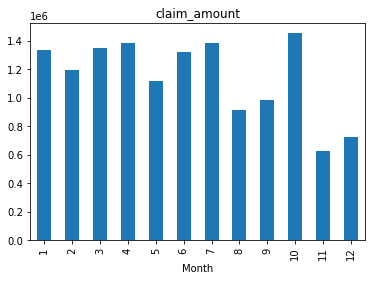

In [79]:
f4=claims_360_data.groupby('Month')['claim_amount'].sum()
f4.plot(kind = 'bar', subplots = True)
plt.show()

#### Q 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [95]:
f5=claims_360_data.groupby (['gender','age_grp','fraudulent'])[['claim_amount']].mean().reset_index()
f5


,gender,age_grp,fraudulent,claim_amount
0,Female,Adult,No,12136.215377
1,Female,Adult,Yes,12202.631451
2,Female,Senior,No,12331.583360
3,Female,Senior,Yes,2378.857143
4,Female,Youth,No,13121.731391
5,Female,Youth,Yes,8843.863658
6,Male,Adult,No,12223.655115
7,Male,Adult,Yes,15470.331256
8,Male,Senior,No,12120.961962
9,Male,Senior,Yes,22921.800000


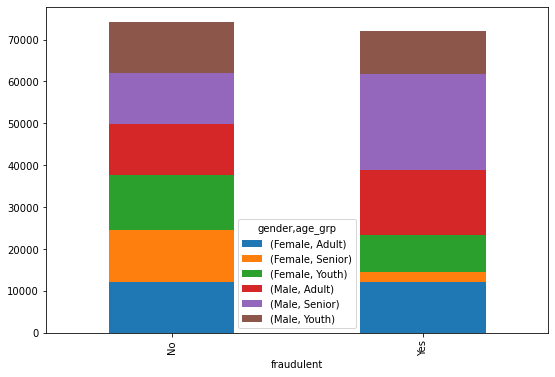

In [104]:
f6=f5.pivot(index= 'fraudulent', columns = ['gender','age_grp'], values = 'claim_amount')
f6.plot( kind = 'bar', stacked = True, figsize =(9,6))
plt.show()

#### Q16 -Is there any similarity in the amount claimed by males and females?

In [105]:
claims_360_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,DateOfBirth,State,Contact,Segment,_merge,alert,age,age_grp,Cal,Month
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,...,1979-01-12,VT,789-916-8172,Platinum,both,0,42,Adult,2017-11-27,11
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,...,1970-01-13,ME,265-543-1264,Silver,both,0,51,Adult,2018-10-03,10


In [106]:
claims_360_data.gender.value_counts()

Male      573
Female    534
Name: gender, dtype: int64

#### ttest, independent sample ttest

In [108]:
male_spend = claims_360_data.loc[claims_360_data.gender == 'Male','claim_amount' ]
female_spend = claims_360_data.loc[claims_360_data.gender == 'Female','claim_amount' ]

print( 'mean of male spend: ', round( male_spend.mean(),1), '| mean of female spend: ', round( female_spend.mean(),1) )

mean of male spend:  12793.8 | mean of female spend:  12064.8


In [109]:
stats.ttest_ind (male_spend, female_spend)

Ttest_indResult(statistic=0.9104294436733774, pvalue=0.36279462510635485)

In [110]:
stats.f_oneway(male_spend, female_spend)

F_onewayResult(statistic=0.8288817719074212, pvalue=0.36279462510626403)

#### Q17 -Is there any relationship between age category and segment?

In [111]:
claims_360_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,DateOfBirth,State,Contact,Segment,_merge,alert,age,age_grp,Cal,Month
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,...,1979-01-12,VT,789-916-8172,Platinum,both,0,42,Adult,2017-11-27,11
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,...,1970-01-13,ME,265-543-1264,Silver,both,0,51,Adult,2018-10-03,10


#### Age Category and Segment - Categorical Data - Chi Square Test

In [114]:
obs_frq = pd.crosstab (claims_360_data.age_grp, claims_360_data.Segment)
obs_frq

Segment,Gold,Platinum,Silver
age_grp,,,
Adult,304,261,256
Senior,13,24,16
Youth,74,80,79


In [115]:
stats.chi2_contingency(obs_frq)

(6.642146944668526,
 0.15605143539899138,
 4,
 array([[289.9828365 , 270.70009033, 260.31707317],
        [ 18.71996387,  17.47515808,  16.80487805],
        [ 82.29719964,  76.82475158,  73.87804878]]))

#### Q18 -The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

#### ttest one sample test

In [116]:
claims_360_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,DateOfBirth,State,Contact,Segment,_merge,alert,age,age_grp,Cal,Month
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,...,1979-01-12,VT,789-916-8172,Platinum,both,0,42,Adult,2017-11-27,11
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,...,1970-01-13,ME,265-543-1264,Silver,both,0,51,Adult,2018-10-03,10


In [117]:
claims_360_data.Cal.max()

Timestamp('2018-10-30 00:00:00')

In [118]:
claims_360_data.Cal.min()

Timestamp('2017-01-01 00:00:00')

#### Fiscal Categories

In [120]:
claims_360_data['Year'] = pd.to_datetime (claims_360_data['Cal'],'%Y-%m-%d').apply(lambda x: x.year)
c.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,State,Contact,Segment,_merge,alert,age,age_grp,Cal,Month,Year
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,...,VT,789-916-8172,Platinum,both,0,42,Adult,2017-11-27,11,2017
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,...,ME,265-543-1264,Silver,both,0,51,Adult,2018-10-03,10,2018


In [155]:
Claim_mean_2017 = round(claims_360_data.loc[claims_360_data.Year == 2017,'claim_amount'].mean(),1)
Claim_mean_2017

12282.4

In [157]:
stats.ttest_1samp(claims_360_data.loc[claims_360_data.Year == 2017,'claim_amount'] ,10000)

Ttest_1sampResult(statistic=4.2298215256590685, pvalue=2.7010352235762283e-05)

#### Q19. Is there any difference between age groups and insurance claims?

In [159]:
claims_360_data.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       '_merge', 'alert', 'age', 'age_grp', 'Cal', 'Month', 'Year'],
      dtype='object')

In [160]:
claims_360_data.age_grp.value_counts()

Adult     821
Youth     233
Senior     53
Name: age_grp, dtype: int64

#### fftest & ANNOVA

In [162]:
claims_360_data.loc[claims_360_data.age_grp == 'Adult'].head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,State,Contact,Segment,_merge,alert,age,age_grp,Cal,Month,Year
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,...,VT,789-916-8172,Platinum,both,0,42,Adult,2017-11-27,11,2017
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,...,ME,265-543-1264,Silver,both,0,51,Adult,2018-10-03,10,2018


In [163]:
# data processing for the test

In [164]:
s1 = claims_360_data.loc[claims_360_data.age_grp == 'Adult', 'claim_amount']
s2=  claims_360_data.loc[claims_360_data.age_grp == 'Youth', 'claim_amount']
s3=  claims_360_data.loc[claims_360_data.age_grp == 'Senior', 'claim_amount']

print( 'mean s1:', round(s1.mean(),1), '| mean s2:', round(s2.mean(),1), '| mean s3:', round(s3.mean(),1) )

mean s1: 12585.1 | mean s2: 12056.0 | mean s3: 11924.7


In [165]:
stats.f_oneway( s1,s2,s3)

F_onewayResult(statistic=0.1851459008579266, pvalue=0.8310088303779681)

#### Q20 - Is there any relationship between total number of policy claims and the claimed amount?

### Correlations

In [166]:
stats.pearsonr (claims_360_data.claim_amount,claims_360_data.total_policy_claims)

(-0.019981393253689823, 0.5066081772729765)

In [167]:
import os
os.getcwd()

'C:\\Users\\somjit.das\\AnalytixLabs'